In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test , y_test) = cifar10.load_data()

In [56]:
X_train.shape

(50000, 32, 32, 3)

In [57]:
X_test.shape

(10000, 32, 32, 3)

In [58]:
y_train.shape

(50000, 1)

In [59]:
y_test.shape

(10000, 1)

[5]


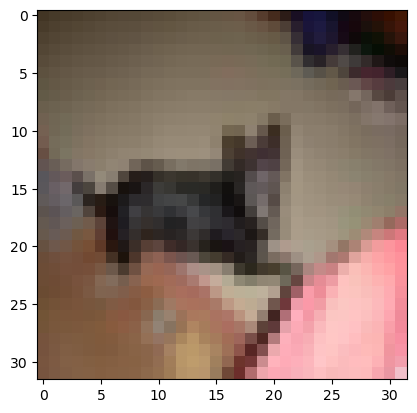

In [60]:
i = 35000
plt.imshow(X_train[i])
print(y_train[i])

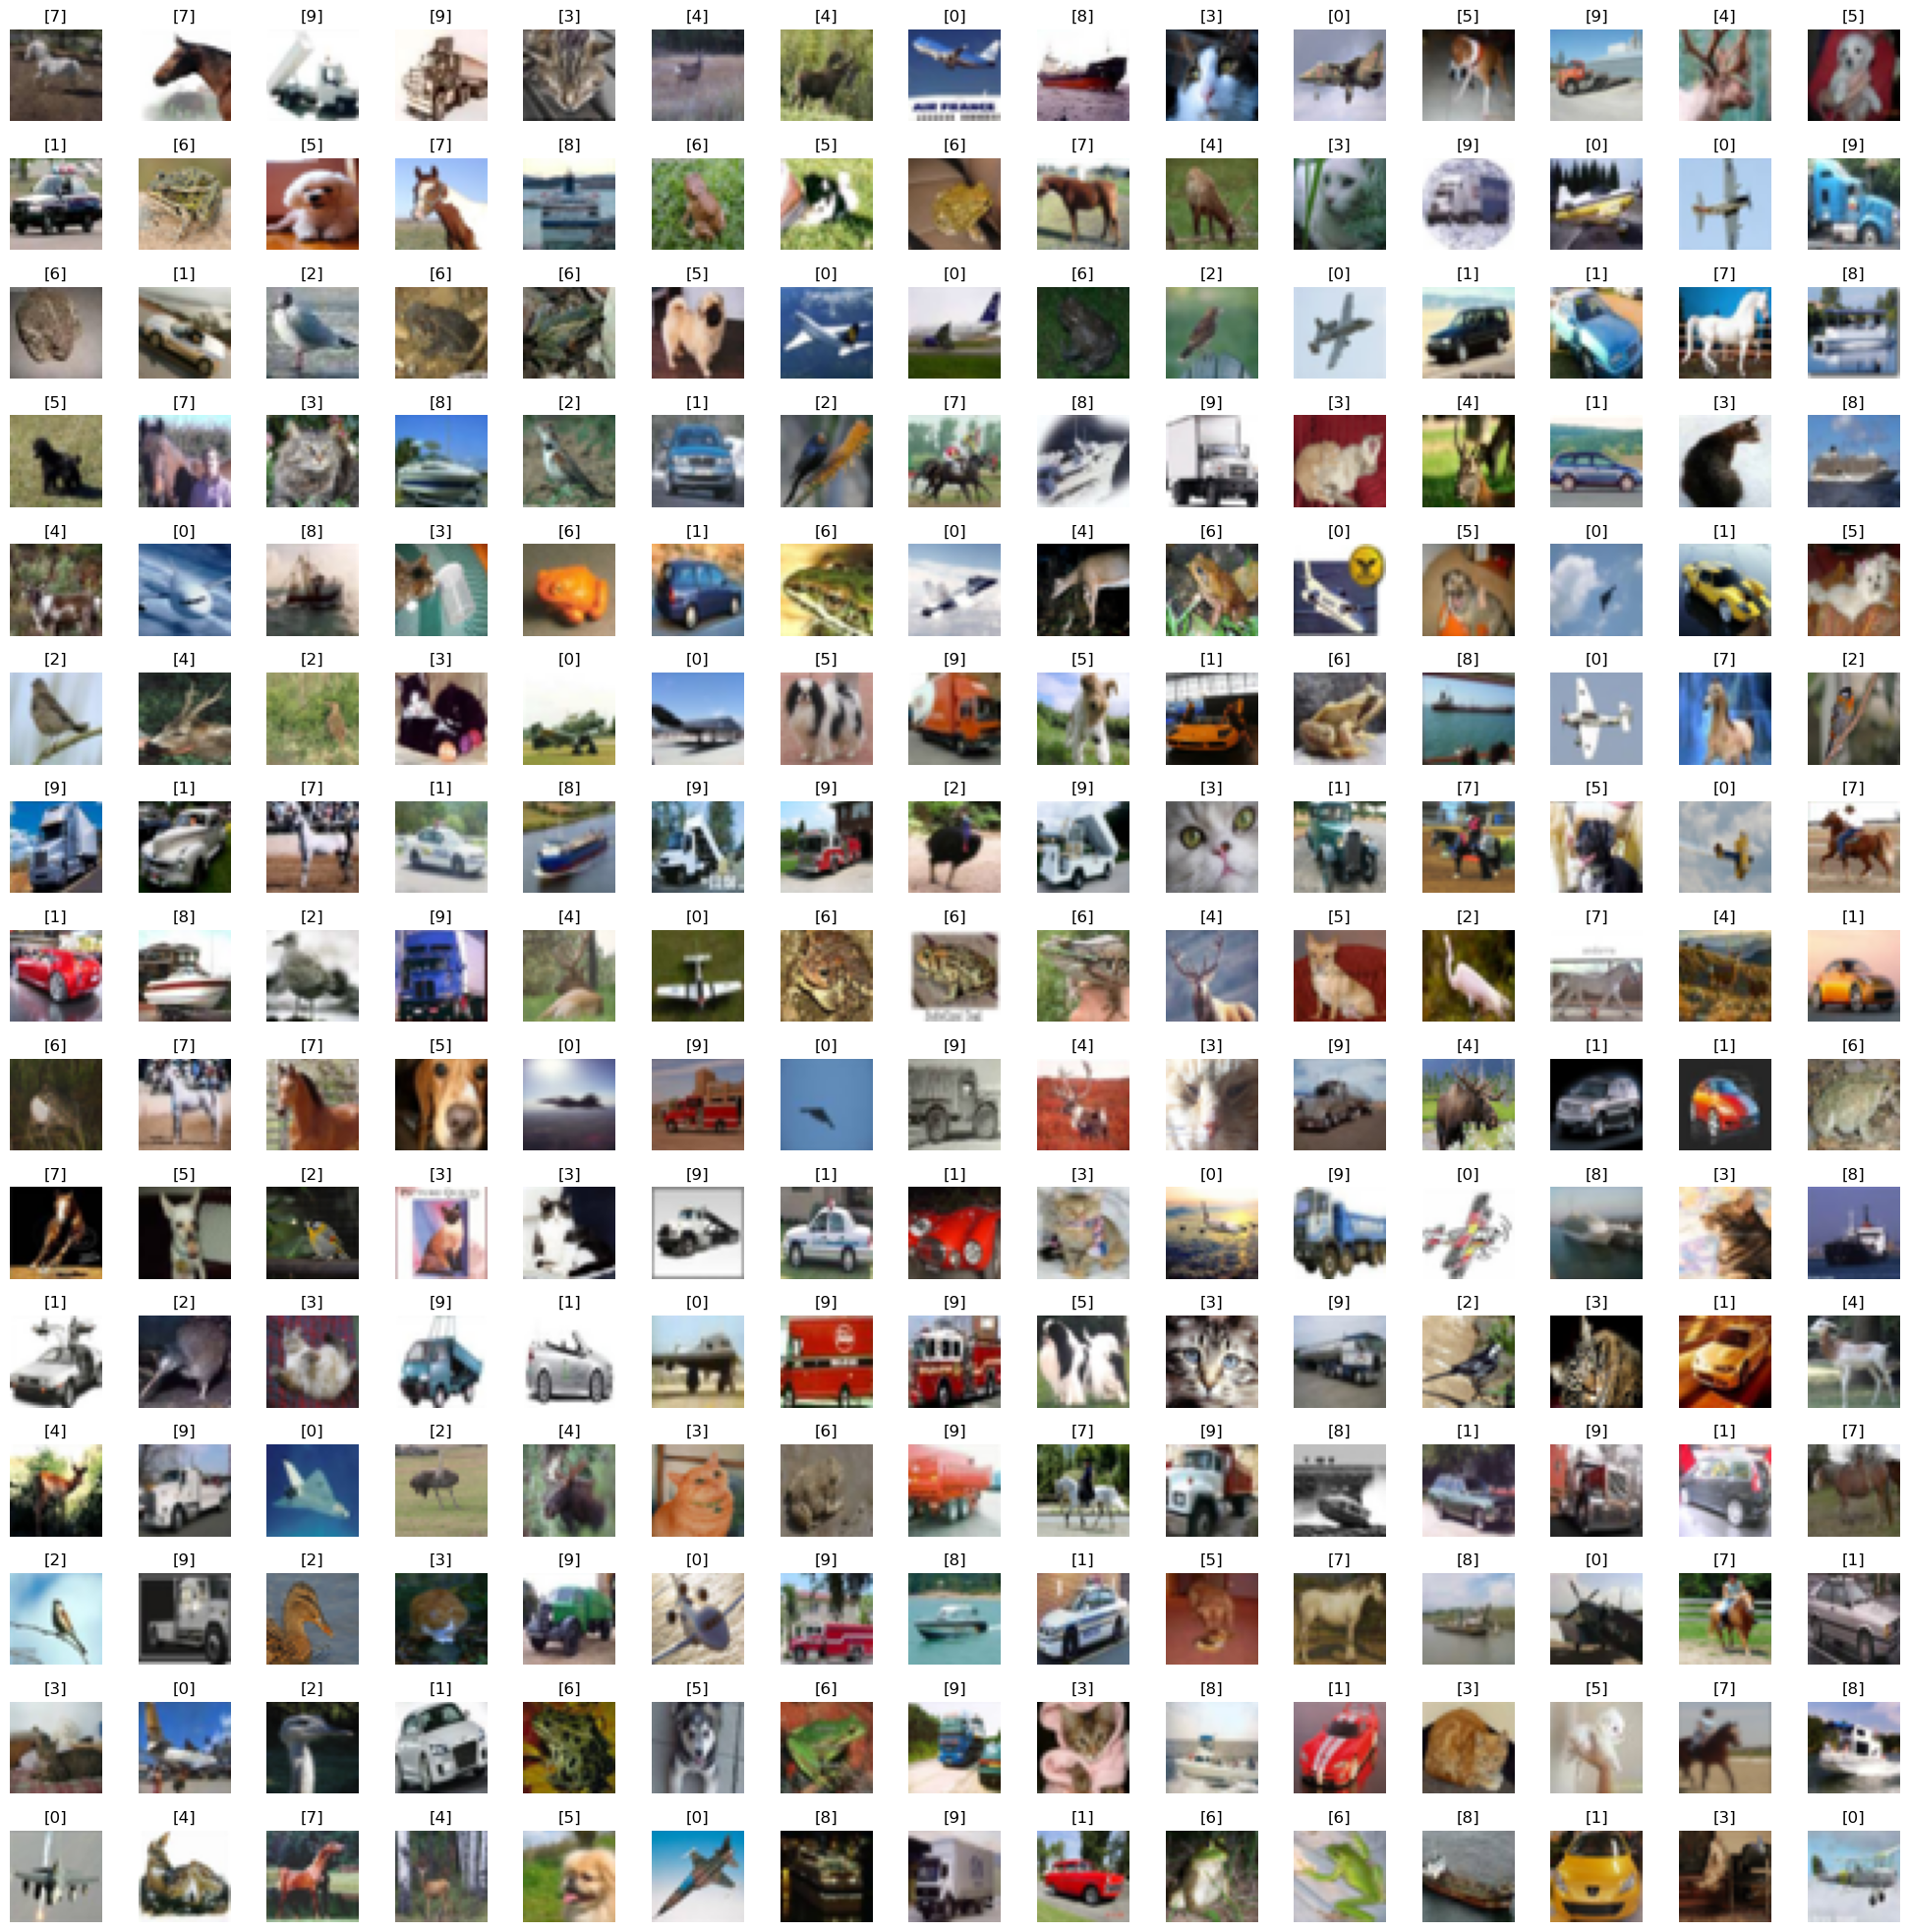

In [61]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

In [62]:
n_training

50000

In [63]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [64]:
number_cat = 10

In [65]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [66]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [67]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [68]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [69]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [70]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [71]:
X_train = X_train/255
X_test = X_test/255

In [72]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [73]:
X_train.shape

(50000, 32, 32, 3)

In [74]:
Input_shape = X_train.shape[1:]

In [75]:
Input_shape

(32, 32, 3)

### Training the Model

In [76]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.callbacks import TensorBoard

In [77]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation='relu'))
cnn_model.add(Dense(units = 1024, activation='relu'))

cnn_model.add(Dense(units=10, activation='softmax'))


C:\Users\johno\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),  # Correct usage
    metrics=['accuracy']
)

In [83]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 1, shuffle = True)




1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 88ms/step - accuracy: 0.2884 - loss: 1.9236


In [84]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5599 - loss: 1.2212
Test Accuracy: 0.5587000250816345


In [85]:
predictions = cnn_model.predict(X_test)  # Get raw probability outputs
predicted_classes = np.argmax(predictions, axis=1)  # Get class with highest probability

print(predicted_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
[3 8 8 ... 5 4 7]


In [86]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [87]:
y_test = y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

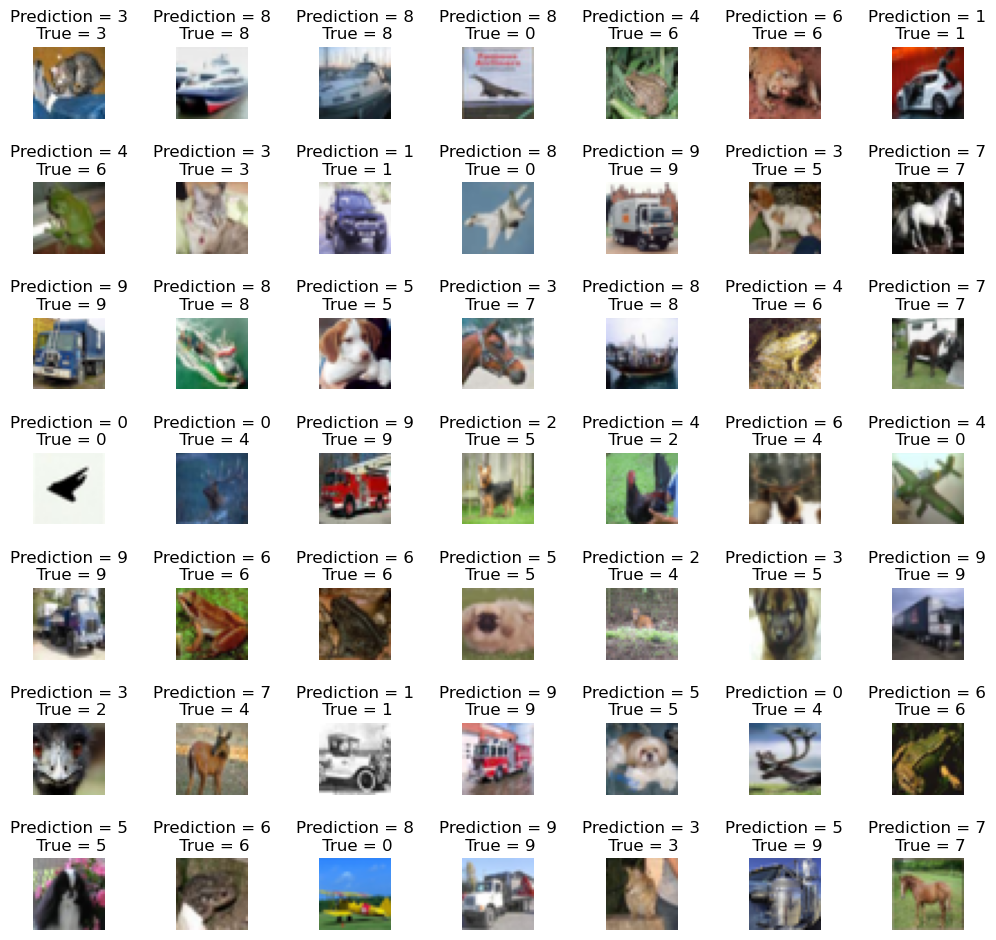

In [88]:
Length = 7
Width = 7
fig, axes = plt.subplots(Length, Width, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, Length*Width):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 1)

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm

array([[447,  13,  80,  22,  24,   4,  22,   4, 330,  54],
       [ 28, 605,  10,  10,   6,   6,  23,  10,  99, 203],
       [ 49,   6, 420,  97, 210,  45,  43,  25,  90,  15],
       [ 23,   7,  86, 401, 109, 161,  83,  31,  73,  26],
       [ 18,   5, 120,  96, 579,  28,  38,  77,  34,   5],
       [ 12,   1, 141, 218,  70, 437,  32,  43,  39,   7],
       [  7,   6,  45, 114, 202,  18, 556,  13,  24,  15],
       [ 10,   4,  58,  70, 110,  87,  10, 598,  28,  25],
       [ 47,  22,  16,  14,   8,   4,   9,   4, 860,  16],
       [ 22,  60,  12,  28,  12,   7,  24,  18, 133, 684]], dtype=int64)

<Axes: >

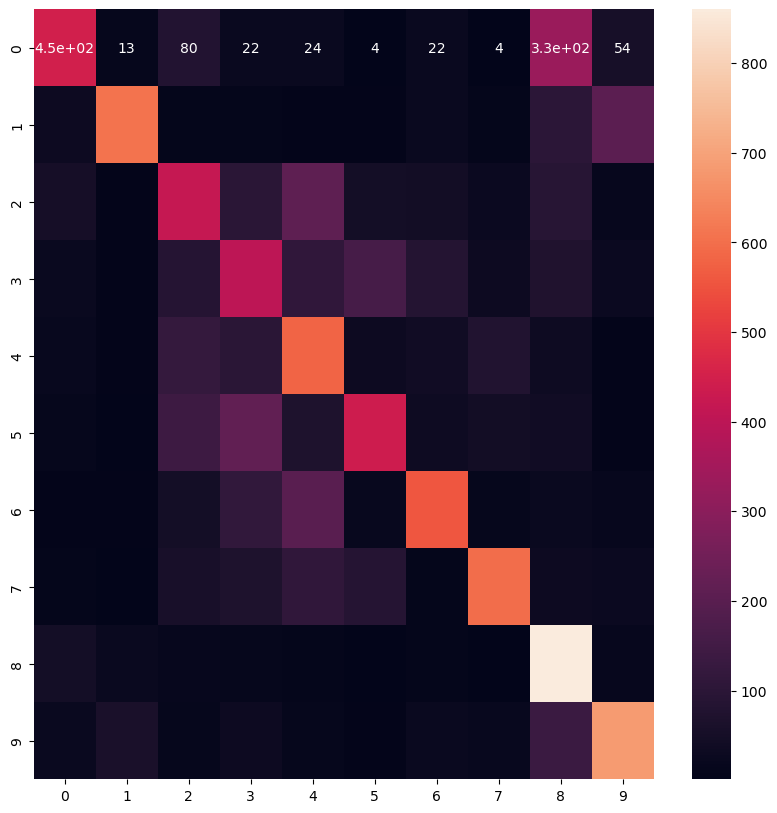

In [90]:
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)

In [91]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_models.h5')
cnn_model.save(model_path)

In [92]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [93]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [94]:
X_train.shape

(50000, 32, 32, 3)

In [95]:
n = 8
X_train_sample = X_train[:n]

In [96]:
X_train_sample.shape

(8, 32, 32, 3)

In [97]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
dataget_train = ImageDataGenerator(rotation_range = 90)
dataget_train.fit(X_train_sample)

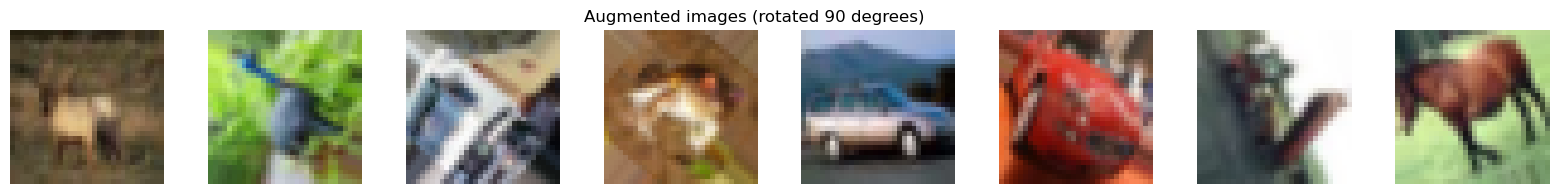

In [98]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

fig = plt.figure(figsize=(20, 2))

for x_batch in dataget_train.flow(X_train_sample, batch_size=n):
    for i in range(n):  
        ax = fig.add_subplot(1, n, i + 1)
        ax.imshow(Image.fromarray(np.uint8(x_batch[i])))  
        ax.axis("off")  

    fig.suptitle("Augmented images (rotated 90 degrees)")  
    plt.show()
    break  

        


        
        
    

In [99]:
datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
)

In [100]:
datagen.fit(X_train)

In [101]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)  # If using validation data



In [49]:
y_train

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0.

In [50]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [103]:
cnn_model.fit(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)

Epoch 1/2


C:\Users\johno\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 93ms/step - accuracy: 0.2393 - loss: 4.1683
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 172s 110ms/step - accuracy: 0.3319 - loss: 1.8683


In [104]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.3968 - loss: 1.6741
Test accuracy 0.3959999978542328


In [105]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)